# Assignment 3

In [1]:
import pandas as pd
import numpy as np
import random

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 USD
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - %lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's



1. Loading data resources/boston_housing_delimiter.csv to pandas
make sure it's properly split
check shape
check head

In [2]:
#YOUR CODE HERE
#import a csv data using pandas.read_csv
data = pd.read_csv("../resources/boston_housing_delimiter.csv",delimiter=";")
print(data.shape)
data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


2. .head() gives all columns.  Sometimes it is useful to see only a few cols.
Select only Age and Tax and perform .head()

In [3]:
# Your code here
#get only age and tax columns
data[['AGE','TAX']].head()

,AGE,TAX
0,65.2,296.0
1,78.9,242.0
2,61.1,242.0
3,45.8,222.0
4,54.2,222.0


3. retrieve age columns greater than 95.
calculate the percentage.
show only TAX column for housing of age greater than 95 using head().

In [4]:
# Your code here
#mask all datas with age > 95 and only get the tax column
over_95 = data.loc[data['AGE'] > 95,'TAX']
#calculate the percentage
print(over_95.index.size/data.index.size*100)
over_95.head()

21.936758893280633


7     311.0
8     311.0
20    307.0
23    307.0
31    307.0
Name: TAX, dtype: float64

4. I want boston housing connected to highways with RAD at least 6 and where DIS is lower than average DIS.
Count how many houses are like that.

In [5]:
# Your code here
#mask data with two conditions then find the index's size
print(data[(data['RAD'] >=  6) & (data['DIS'] < data['DIS'].mean())].index.size)

165


5. using df.columns, loop through and perform sum for each columns

In [6]:
# Your code here
for column in data.columns:
    print(column,sum(data[column]))

CRIM 1828.4429200000002
ZN 5750.0
INDUS 5635.210000000011
CHAS 35.0
NOX 280.67569999999984
RM 3180.0250000000046
AGE 34698.900000000016
DIS 1920.291599999999
RAD 4832.0
TAX 206568.0
PTRATIO 9338.500000000011
B 180477.0599999996
LSTAT 6402.450000000002
MEDV 11401.600000000013


6. using df.columns, loop through them and perform rename to lowercase

In [7]:
# Your code here
#use rename function to rename to column to the lowercase column which is created using dictionary comprehension
data.rename(columns={column:column.lower() for column in data.columns})

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


7. convert column RAD to int type

In [8]:
# Your code here
#use astype to get the int version and put that to the original column
data['RAD'] = data['RAD'].astype(int)
print(data['RAD'].dtype)

int64


8. drop all columns with DIS greater than DIS mean.

in addition, drop CHAS column.

df.drop (remember it's not inplace!)

In [9]:
# Your code here
#get the ix for where the condition holds
ix = data[data['DIS'] > data['DIS'].mean()].index
#drop both the index and columns
data.drop(index = ix,columns='CHAS',inplace=True)
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
33,1.15172,0.0,8.14,0.538,5.701,95.0,3.7872,4,307.0,21.0,358.77,18.35,13.1
34,1.61282,0.0,8.14,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
35,0.06417,0.0,5.96,0.499,5.933,68.2,3.3603,5,279.0,19.2,396.90,9.68,18.9
36,0.09744,0.0,5.96,0.499,5.841,61.4,3.3779,5,279.0,19.2,377.56,11.41,20.0
87,0.07151,0.0,4.49,0.449,6.121,56.8,3.7476,3,247.0,18.5,395.15,8.44,22.2


9. check if housing is priced higher when nearer to highways.

i.e., show mean of MEDV group by RAD

In [10]:
# Your code here
#create a group 'RAD' and find its mean
rad_group = data.groupby('RAD')
print(rad_group['MEDV'].mean())

RAD
1     20.160000
2     24.900000
3     34.644444
4     18.058333
5     25.998507
6     20.005882
7     30.000000
8     33.700000
24    16.325385
Name: MEDV, dtype: float64


10. let's add some arbitrary zip codes to the dataset.

<code>zipcodes = [101, 102, 103, np.nan]</code>

<code>df['zip_code'] = pd.Series([random.choice(zipcodes) for i in df.index])</code>

check any missing values.

replace with majority  #mode return a series, use [0] to get the number.

check again any missing values.

In [11]:
# Your code here
zipcodes = [101, 102, 103, np.nan]
data['zip_code'] = pd.Series([random.choice(zipcodes) for i in data.index])
#count the number of nulls
print(data['zip_code'].isnull().sum())
#find the mode
mode = data['zip_code'].mode()
#use mode[0] to fill all the null/nan values
data['zip_code'].fillna(mode[0], inplace=True)
print(data['zip_code'].isnull().sum())

195
0


11. Here is another dataset with zip codes and corresponding electricity rate, and water rate

<code>zip_dict = {'zip_code' : [101, 102, 103], 'e_rate': [5.643, 2.234, 13.42],'w_rate': [1.21, 1.23, 1.99]}</code>

<code>zip_df = pd.DataFrame.from_dict(zip_dict)</code>

<code>zip_df.head()</code>

merge them with the existing dataset, so every row has e_rate and w_rate

In [12]:
# Your code here
zip_dict = {'zip_code': [101,102,103], 'e_rate':[5.643,2.234,13.42], 'w_rate':[1.21,1.23,1.99]}
zip_df = pd.DataFrame(zip_dict)
print(zip_df.head())
#use the merge function to merge two dataframes using a specific column
pd.merge(data,zip_df,on="zip_code",how='left')

   zip_code  e_rate  w_rate
0       101   5.643    1.21
1       102   2.234    1.23
2       103  13.420    1.99


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,zip_code,e_rate,w_rate
0,1.15172,0.0,8.14,0.538,5.701,95.0,3.7872,4,307.0,21.0,358.77,18.35,13.1,101.0,5.643,1.21
1,1.61282,0.0,8.14,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5,102.0,2.234,1.23
2,0.06417,0.0,5.96,0.499,5.933,68.2,3.3603,5,279.0,19.2,396.90,9.68,18.9,103.0,13.420,1.99
3,0.09744,0.0,5.96,0.499,5.841,61.4,3.3779,5,279.0,19.2,377.56,11.41,20.0,103.0,13.420,1.99
4,0.07151,0.0,4.49,0.449,6.121,56.8,3.7476,3,247.0,18.5,395.15,8.44,22.2,101.0,5.643,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,103.0,13.420,1.99
294,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,103.0,13.420,1.99
295,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,103.0,13.420,1.99
296,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,103.0,13.420,1.99


# Apple Stock

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

apple = pd.read_csv("../resources/appl_1980_2014.csv")
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


12. Transform date column to datetime type.

Then set the date column as index and filter only with year not less than 1987

In [14]:
#change date to a datetime type
apple['Date'] = pd.to_datetime(apple['Date'])
#set 'Date' as the index
apple.set_index('Date',inplace=True)
#mask all the years greater or equal to 1987
apple = apple[apple.index >= '1987']
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


13. use index.is_unique to check whether all index are unique

In [15]:
# Your code here
print(apple.index.is_unique)

True


14. Sort the index in a ascending order (oldest date first) - use sort_index

In [16]:
# Your code here
#use pandas sort_index function to sort the datetime index
apple.sort_index(ascending = True, inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1987-01-02,40.37,41.13,40.13,40.87,30217600,0.64
1987-01-05,41.25,43.25,41.00,43.00,59920000,0.67
1987-01-06,43.13,44.00,42.62,43.75,81200000,0.68
1987-01-07,43.87,44.88,43.63,44.75,108640000,0.70
1987-01-08,44.75,45.12,44.50,44.75,72800000,0.70


15. I want to know how apple does on end of every month, thus get the mean value for each columns, resample at last buiness day of each month (i.e., BM)

In [17]:
# Your code here
#take samples at the end of the month
monthly = apple.resample('BM').mean()
monthly

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1987-01-30,48.119048,49.666667,47.165714,48.732857,9.843947e+07,0.759524
1987-02-27,59.625789,61.262632,58.513158,60.382632,8.705495e+07,0.940000
1987-03-31,66.363636,67.505909,65.135909,66.221818,6.771953e+07,1.031364
1987-04-30,71.565238,73.451905,70.565714,72.196667,8.110907e+07,1.124286
1987-05-29,77.750000,78.906500,76.756500,77.818500,4.798696e+07,1.213500
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


16. BTW, how many months do we have in our data?

In [18]:
# Your code here
print(monthly.index.size)

331


17. Compare this year and last year High column.

Explain what do you see. 

You may use .plot() for easy visualization

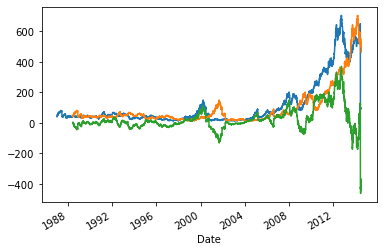

In [19]:
# Your code here
apple_high = apple['High']
#create a shifted apple_high
apple_high_last_year = apple_high.shift(365)
#deduct the unshifted and shifted values
apple_high_difference = apple_high-apple_high_last_year
#plot
apple_high.plot()
apple_high_last_year.plot()
apple_high_difference.plot()
#There was a relatively low difference until 2008, it then experienced a steady growth and a quick decline afterwards.

18. Resample to 3 years and run .plot()

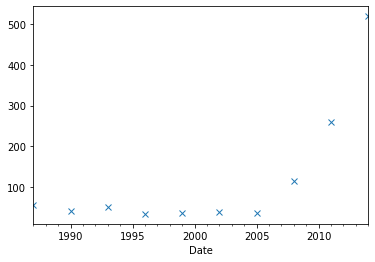

In [20]:
# Your code here
three_years = apple.resample('3Y').mean()
three_years['High'].plot(style='x')

19. Perform a rolling mean (moving average) of Close with window size of 100 days

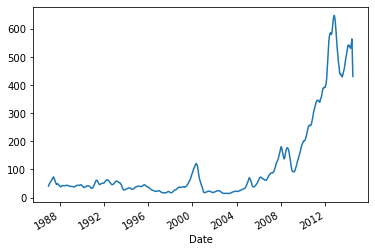

In [21]:
# Your code here
close_avg2 = apple.rolling(window='100D').mean()
close_avg2['Close'].plot()

20. let's compare them based on return rate based on the first day of IPO.

i.e., close price / close price [0], where [0] is the first close price.

To make things even more interesting, we shall look at the performance from year 2000 onwards....

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2000-01-03  59.312500  56.000000  58.687500  58.281250  53228400.0  37.199776
2000-01-04  58.562500  56.125000  56.781250  56.312500  54119000.0  35.943153
2000-01-05  58.187500  54.687500  55.562500  56.906250  64059600.0  36.322121
2000-01-06  56.937500  54.187500  56.093750  55.000000  54976600.0  35.105415
2000-01-07  56.125000  53.656250  54.312500  55.718750  62013600.0  35.564171
...               ...        ...        ...        ...         ...        ...
2013-12-24  37.169998  36.639999  36.720001  37.080002  14243000.0  32.145939
2013-12-26  37.490002  37.169998  37.200001  37.439999  17612800.0  32.458023
2013-12-27  37.619999  37.169998  37.580002  37.290001  14563000.0  32.327995
2013-12-30  37.380001  36.900002  37.220001  37.290001  16290500.0  32.327995
2013-12-31  37.580002  37.220001  37.400002  37.410000  17503500

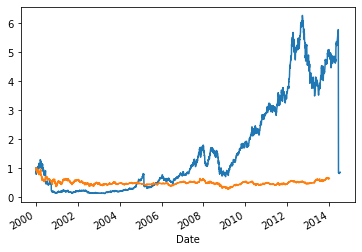

In [22]:
microsoft = pd.read_csv('../resources/microsoft.csv')

microsoft.head()

# Your code here
#convert date to datetime
microsoft['Date'] = pd.to_datetime(microsoft['Date'])
#set date to be the index
microsoft.set_index('Date',inplace=True)
microsoft = microsoft[microsoft.index >= '2000']
print(microsoft)

apple_close = apple.loc['2000':,'Close']
#calculate the return for apple
apple_return = apple_close/apple_close[0]
microsoft_close = microsoft.loc['2000':,'Close']
#calculate the return for microsoft
microsoft_return = microsoft_close/microsoft_close[0]
print(microsoft_return)
print(apple_return)
apple_return.plot()
microsoft_return.plot()

# Euro CUP

In [23]:
euro = pd.read_csv("../resources/euro2012.csv")
euro.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


21. let's check which country get the most red cards and yellow cards

In [24]:
# Your code here

#print the country with the most yellow cards
print(euro.loc[euro['Yellow Cards'] == euro['Yellow Cards'].max(),['Team','Yellow Cards']])
print()
#print the coutnry with the most red cards
print(euro.loc[euro['Red Cards'] == euro['Red Cards'].max(),['Team', 'Red Cards']])


    Team  Yellow Cards
7  Italy            16

                   Team  Red Cards
6                Greece          1
9                Poland          1
11  Republic of Ireland          1


22. check which team score more than 6 goals

In [25]:
# Your code here
print(euro.loc[euro['Goals'] > 6,['Team','Goals']])

       Team  Goals
5   Germany     10
13    Spain     12


23. select team starting with 'C'

In [26]:
# Your code here
print(euro.loc[euro['Team'].str.startswith('C'),'Team'])

0           Croatia
1    Czech Republic
Name: Team, dtype: object


24. select all columns except the last 3

In [27]:
# Your code here
euro.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


25. create new column luck_index which is based on Hit Woodwork.  

pd.cut to create three bins of luck index.

give labels as High, Medium, Low.

In [28]:
# Your code here
euro['luck_index'] = pd.cut(euro['Hit Woodwork'],3,labels=["High","Medium","Low"])
euro

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,luck_index
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,81.3%,41,62,2,9,0,9,9,16,High
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,60.1%,53,73,8,7,0,11,11,19,High
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,66.7%,25,38,8,4,0,7,7,15,High
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,88.1%,43,45,6,5,0,11,11,16,High
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,54.6%,36,51,5,6,0,11,11,19,High
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,62.6%,63,49,12,4,0,15,15,17,High
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,65.1%,67,48,12,9,1,12,12,20,High
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,74.1%,101,89,16,16,0,18,18,19,High
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,70.6%,35,30,3,5,0,7,7,15,High
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,66.7%,48,56,3,7,1,7,7,17,High


26. create new column "always_lose_goals" which has values of True or False based on clean sheets, if clean sheets is 0, then is True, otherwise False

In [29]:
# Your code here
euro['always_lose_goals'] = euro['Clean Sheets'].apply(lambda x: not bool(x))
euro

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,luck_index,always_lose_goals
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,41,62,2,9,0,9,9,16,High,True
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,53,73,8,7,0,11,11,19,High,False
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,25,38,8,4,0,7,7,15,High,False
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,43,45,6,5,0,11,11,16,High,False
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,36,51,5,6,0,11,11,19,High,False
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,63,49,12,4,0,15,15,17,High,False
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,67,48,12,9,1,12,12,20,High,False
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,101,89,16,16,0,18,18,19,High,False
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,35,30,3,5,0,7,7,15,High,True
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,48,56,3,7,1,7,7,17,High,True


27. let's find out whether our luck_index works.

group by luck_index, find the mean of goals and % Goals-to-shots

In [30]:
# Your code here
#take out the % sign and change the datatype to a float
euro['% Goals-to-shots'] = euro['% Goals-to-shots'].apply(lambda x: float(x.strip('%'))/100)
#find the mean of the luck_index group
luck = euro.groupby('luck_index').mean()
luck.loc[:,['Goals','% Goals-to-shots']]

,Goals,% Goals-to-shots
luck_index,,
High,4.642857,0.117071
Medium,5.000000,0.138000
Low,6.000000,0.093000
